In [1]:
!unzip Train_Dataset.zip

unzip:  cannot find or open Train_Dataset.zip, Train_Dataset.zip.zip or Train_Dataset.zip.ZIP.


In [2]:
!rm Train_Dataset.zip

rm: Train_Dataset.zip: No such file or directory


In [3]:
!python3 -m pip install ipython-sql

### Import Libraries

In [4]:
#importing neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy
from sqlalchemy import text
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
import pyspark
from pyspark.sql import SparkSession
%matplotlib inline

### Loading Dataset to Dataframe

In [5]:
dataset = pd.read_csv('train.csv',low_memory=False)
dataset.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [6]:

#dropping features which are not useful for determining the credit score
final_dataset = dataset.drop(["Amount_invested_monthly", "SSN", "Name", "Month", "Age", "Num_Bank_Accounts", "Num_Credit_Card", "Interest_Rate", "Type_of_Loan", "Changed_Credit_Limit", "Num_Credit_Inquiries", "Credit_Mix", "Credit_Utilization_Ratio"], axis=1)

In [7]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      100000 non-null  object 
 1   Customer_ID             100000 non-null  object 
 2   Occupation              100000 non-null  object 
 3   Annual_Income           100000 non-null  object 
 4   Monthly_Inhand_Salary   84998 non-null   float64
 5   Num_of_Loan             100000 non-null  object 
 6   Delay_from_due_date     100000 non-null  int64  
 7   Num_of_Delayed_Payment  92998 non-null   object 
 8   Outstanding_Debt        100000 non-null  object 
 9   Credit_History_Age      90970 non-null   object 
 10  Payment_of_Min_Amount   100000 non-null  object 
 11  Total_EMI_per_month     100000 non-null  float64
 12  Payment_Behaviour       100000 non-null  object 
 13  Monthly_Balance         98800 non-null   object 
 14  Credit_Score         

In [8]:
final_dataset.to_csv('final_dataset.csv', index=False)

In [9]:
#final_dataset = pd.read_csv('final_dataset.csv', low_memory=False)
x = final_dataset.iloc[:,:-1].values
y = final_dataset.iloc[:,-1].values

In [10]:
x

array([['0x1602', 'CUS_0xd40', 'Scientist', ..., 49.57494921489417,
        'High_spent_Small_value_payments', '312.49408867943663'],
       ['0x1603', 'CUS_0xd40', 'Scientist', ..., 49.57494921489417,
        'Low_spent_Large_value_payments', '284.62916249607184'],
       ['0x1604', 'CUS_0xd40', 'Scientist', ..., 49.57494921489417,
        'Low_spent_Medium_value_payments', '331.2098628537912'],
       ...,
       ['0x25feb', 'CUS_0x942c', 'Mechanic', ..., 35.10402261040746,
        'High_spent_Large_value_payments', '516.8090832742814'],
       ['0x25fec', 'CUS_0x942c', 'Mechanic', ..., 35.10402261040746,
        'Low_spent_Large_value_payments', '319.1649785257098'],
       ['0x25fed', 'CUS_0x942c', 'Mechanic', ..., 35.10402261040746,
        '!@9#%8', '393.6736955618808']], dtype=object)

In [11]:
y

array(['Good', 'Good', 'Good', ..., 'Poor', 'Standard', 'Poor'],
      dtype=object)

In [12]:
final_dataset.head()

,ID,Customer_ID,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,Scientist,19114.12,1824.843333,4,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,Scientist,19114.12,NaN,4,-1,NaN,809.98,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,Scientist,19114.12,NaN,4,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,Scientist,19114.12,NaN,4,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,Scientist,19114.12,1824.843333,4,6,NaN,809.98,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,Good


In [13]:
final_dataset.shape

(100000, 15)

## Data Cleaning and fixing variables

In [14]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      100000 non-null  object 
 1   Customer_ID             100000 non-null  object 
 2   Occupation              100000 non-null  object 
 3   Annual_Income           100000 non-null  object 
 4   Monthly_Inhand_Salary   84998 non-null   float64
 5   Num_of_Loan             100000 non-null  object 
 6   Delay_from_due_date     100000 non-null  int64  
 7   Num_of_Delayed_Payment  92998 non-null   object 
 8   Outstanding_Debt        100000 non-null  object 
 9   Credit_History_Age      90970 non-null   object 
 10  Payment_of_Min_Amount   100000 non-null  object 
 11  Total_EMI_per_month     100000 non-null  float64
 12  Payment_Behaviour       100000 non-null  object 
 13  Monthly_Balance         98800 non-null   object 
 14  Credit_Score         

In [15]:
100000-84998

15002

#### Identifying the number of Null Values and related Customer Id for Validation

In [16]:
null_mask = final_dataset["Monthly_Inhand_Salary"].isnull()
null_mask
final_dataset[null_mask]

,ID,Customer_ID,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x1603,CUS_0xd40,Scientist,19114.12,NaN,4,-1,NaN,809.98,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,Scientist,19114.12,NaN,4,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,Scientist,19114.12,NaN,4,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good
5,0x1607,CUS_0xd40,Scientist,19114.12,NaN,4,8,4,809.98,22 Years and 6 Months,No,49.574949,!@9#%8,340.4792117872438,Good
11,0x1611,CUS_0x21b1,Teacher,34847.84,NaN,1,3,3_,605.03,26 Years and 10 Months,No,18.816215,Low_spent_Medium_value_payments,465.6762241330048,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99944,0x25f9e,CUS_0x51b3,Media_Manager,59146.36,NaN,1,8,6,418.03,NaN,No,26.778419,Low_spent_Small_value_payments,147.67137163088418,Standard
99955,0x25fad,CUS_0x2084,Architect,38321.39,NaN,4,11,7,678.57,17 Years and 2 Months,No,362.072453,Low_spent_Large_value_payments,197.46057710771268,Standard
99963,0x25fb9,CUS_0x372c,Lawyer,42903.79,NaN,1,14,0,1079.48,NaN,No,34.975457,High_spent_Large_value_payments,520.6622073726148,Standard
99975,0x25fc9,CUS_0xf16,Media_Manager,16680.35,NaN,4,1,0,897.16,NaN,No,41.113561,Low_spent_Large_value_payments,310.8838062920152,Good


In [17]:
grouped_df = final_dataset.groupby("Customer_ID")

In [18]:
print(grouped_df["Monthly_Inhand_Salary"].count())

Customer_ID
CUS_0x1000    7
CUS_0x1009    8
CUS_0x100b    7
CUS_0x1011    7
CUS_0x1013    5
             ..
CUS_0xff3     7
CUS_0xff4     7
CUS_0xff6     8
CUS_0xffc     8
CUS_0xffd     7
Name: Monthly_Inhand_Salary, Length: 12500, dtype: int64


**Observation**
* Totally 15002 entries has null values for the Monthly_Inhand_Salary
* Out of 100000 , we have 12500 Unique Customer_ID
* Need to impute the Missing Values for the 15002 Entries

### Deal with the missing values of Monthly_Inhand_Salary columns

In [19]:
# Convert the Customer_ID column to a factor
final_dataset['Customer_ID'] = final_dataset['Customer_ID'].astype('category')

# Calculate the median Inhand Salary by customer using groupby and summarize
median_Inhand_salary_by_customer = final_dataset.groupby('Customer_ID').agg(median_salary=('Monthly_Inhand_Salary', 'median'))

# Join the median salary column to the dataset
final_dataset = pd.merge(final_dataset, median_Inhand_salary_by_customer, on='Customer_ID', how='left')

# Replace missing values in Monthly Inhand Salary column with median salary
final_dataset['Monthly_Inhand_Salary'].fillna(final_dataset['median_salary'], inplace=True)

# Drop the median salary column
final_dataset.drop('median_salary', axis=1, inplace=True)


In [20]:
median_Inhand_salary_by_customer

,median_salary
Customer_ID,
CUS_0x1000,2706.161667
CUS_0x1009,4250.390000
CUS_0x100b,9549.782500
CUS_0x1011,5208.872500
CUS_0x1013,7962.415000
...,...
CUS_0xff3,1176.398750
CUS_0xff4,2415.855000
CUS_0xff6,9727.326667


In [21]:
median_Inhand_salary_by_customer.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 12500 entries, CUS_0x1000 to CUS_0xffd
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median_salary  12500 non-null  float64
dtypes: float64(1)
memory usage: 477.8 KB


In [22]:
median_Inhand_salary_by_customer.describe()

,median_salary
count,12500.000000
mean,4198.390362
std,3187.681114
min,303.645417
25%,1626.719792
50%,3094.825000
75%,5961.664375
max,15204.633333


In [23]:
final_dataset["Monthly_Inhand_Salary"].describe()

count    100000.000000
mean       4198.490149
std        3187.491752
min         303.645417
25%        1626.761667
50%        3095.978333
75%        5961.637500
max       15204.633333
Name: Monthly_Inhand_Salary, dtype: float64

In [24]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   ID                      100000 non-null  object  
 1   Customer_ID             100000 non-null  category
 2   Occupation              100000 non-null  object  
 3   Annual_Income           100000 non-null  object  
 4   Monthly_Inhand_Salary   100000 non-null  float64 
 5   Num_of_Loan             100000 non-null  object  
 6   Delay_from_due_date     100000 non-null  int64   
 7   Num_of_Delayed_Payment  92998 non-null   object  
 8   Outstanding_Debt        100000 non-null  object  
 9   Credit_History_Age      90970 non-null   object  
 10  Payment_of_Min_Amount   100000 non-null  object  
 11  Total_EMI_per_month     100000 non-null  float64 
 12  Payment_Behaviour       100000 non-null  object  
 13  Monthly_Balance         98800 non-null   object  
 14  Credi

### Deal with the missing values and '_' of Num_of_Delayed_Payment 

In [25]:
null_mask_1 = final_dataset["Num_of_Delayed_Payment"].isnull()
null_mask_1
final_dataset[null_mask_1]

,ID,Customer_ID,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x1603,CUS_0xd40,Scientist,19114.12,1824.843333,4,-1,NaN,809.98,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,Good
4,0x1606,CUS_0xd40,Scientist,19114.12,1824.843333,4,6,NaN,809.98,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,Good
30,0x162c,CUS_0xb891,Entrepreneur,30689.89,2612.490833,1,5,NaN,632.46,17 Years and 9 Months,No,16.415452,Low_spent_Large_value_payments,443.5499567906391,Standard
32,0x1632,CUS_0x1cdb,Developer,35547.71_,2853.309167,0,5,NaN,943.86,30 Years and 8 Months,Yes,0.000000,!@9#%8,288.60552234930395,Standard
33,0x1633,CUS_0x1cdb,Developer,35547.71,2853.309167,0,9,NaN,943.86,30 Years and 9 Months,NM,0.000000,High_spent_Medium_value_payments,460.88727561667037,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99973,0x25fc7,CUS_0xf16,Media_Manager,16680.35,1528.029167,4,1,NaN,897.16,21 Years and 6 Months,No,41.113561,Low_spent_Small_value_payments,233.3015390325111,Good
99974,0x25fc8,CUS_0xf16,Media_Manager,16680.35_,1528.029167,4,1,NaN,897.16,21 Years and 7 Months,No,41.113561,Low_spent_Small_value_payments,340.68483402219437,Good
99992,0x25fe6,CUS_0x942c,Mechanic,39628.99,3359.415833,2,23,NaN,502.38,31 Years and 3 Months,No,35.104023,Low_spent_Small_value_payments,189.64108011929028,Poor
99993,0x25fe7,CUS_0x942c,Mechanic,39628.99_,3359.415833,2,23,NaN,502.38,31 Years and 4 Months,No,58638.000000,Low_spent_Medium_value_payments,400.1044655284761,Standard


In [26]:
final_dataset["Num_of_Delayed_Payment"].describe()

count     92998
unique      749
top          19
freq       5327
Name: Num_of_Delayed_Payment, dtype: object

In [27]:
# replace the '_' with ''
final_dataset['Num_of_Delayed_Payment'] = final_dataset['Num_of_Delayed_Payment'].replace('_', '', regex=True)

# convert to numeric
final_dataset['Num_of_Delayed_Payment'] = final_dataset['Num_of_Delayed_Payment'].astype(float)

In [28]:
final_dataset["Num_of_Delayed_Payment"].describe()

count    92998.000000
mean        30.923342
std        226.031892
min         -3.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [29]:
#Changing the Negative Values in the Num_of_Delayed_Payemnts to '0' as it cannot be negative
final_dataset.Num_of_Delayed_Payment= final_dataset.Num_of_Delayed_Payment.mask(final_dataset.Num_of_Delayed_Payment.lt(0),0)

In [30]:
final_dataset.Num_of_Delayed_Payment.describe()

count    92998.000000
mean        30.934805
std        226.030273
min          0.000000
25%          9.000000
50%         14.000000
75%         18.000000
max       4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

**Observation**

* Totally 7002 entries has null values for the Num_of_Delayed_Payment
* We had Negative Values which was also normalized to '0' as the Num_of_Delayed_Paymen cannot be negative
* Need to impute the Missing Values for the 7002 Entries

In [31]:
# Calculate the median delayed payments by customer using groupby and summarize
median_delayed_by_customer = final_dataset.groupby('Customer_ID').agg(median_delayed=('Num_of_Delayed_Payment', 'median'))

# Join the median delayed payments column to the dataset
final_dataset = pd.merge(final_dataset, median_delayed_by_customer, on='Customer_ID', how='left')

# Replace missing values in Num of Delayed Payment column with median delayed payments
final_dataset['Num_of_Delayed_Payment'].fillna(final_dataset['median_delayed'], inplace=True)


# Drop the median delayed payments column
final_dataset.drop('median_delayed', axis=1, inplace=True)

In [32]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   ID                      100000 non-null  object  
 1   Customer_ID             100000 non-null  category
 2   Occupation              100000 non-null  object  
 3   Annual_Income           100000 non-null  object  
 4   Monthly_Inhand_Salary   100000 non-null  float64 
 5   Num_of_Loan             100000 non-null  object  
 6   Delay_from_due_date     100000 non-null  int64   
 7   Num_of_Delayed_Payment  100000 non-null  float64 
 8   Outstanding_Debt        100000 non-null  object  
 9   Credit_History_Age      90970 non-null   object  
 10  Payment_of_Min_Amount   100000 non-null  object  
 11  Total_EMI_per_month     100000 non-null  float64 
 12  Payment_Behaviour       100000 non-null  object  
 13  Monthly_Balance         98800 non-null   object  
 14  Credi

### Deal with the missing values and '_' of Monthly_Balance

In [33]:
# replace the '_' with ''
final_dataset['Monthly_Balance'] = final_dataset['Monthly_Balance'].replace('_', '', regex=True)
# convert to numeric
final_dataset['Monthly_Balance'] = final_dataset['Monthly_Balance'].astype(float)

In [34]:
final_dataset.Monthly_Balance.describe()

count    9.880000e+04
mean    -3.036437e+22
std      3.181295e+24
min     -3.333333e+26
25%      2.700922e+02
50%      3.367192e+02
75%      4.702202e+02
max      1.602041e+03
Name: Monthly_Balance, dtype: float64

In [35]:
final_dataset.index[final_dataset['Monthly_Balance'] < 0]

Int64Index([5545, 26177, 29158, 35570, 38622, 60009, 75251, 82918, 83255], dtype='int64')

In [36]:
final_dataset.iloc[29158]

ID                                                 0xc0d8
Customer_ID                                    CUS_0x288d
Occupation                                         Lawyer
Annual_Income                                    30748.93
Monthly_Inhand_Salary                         2572.410833
Num_of_Loan                                             2
Delay_from_due_date                                    10
Num_of_Delayed_Payment                                3.0
Outstanding_Debt                                   860.97
Credit_History_Age                  19 Years and 5 Months
Payment_of_Min_Amount                                  No
Total_EMI_per_month                             43.727774
Payment_Behaviour         High_spent_Small_value_payments
Monthly_Balance            -333333333333333314856026112.0
Credit_Score                                     Standard
Name: 29158, dtype: object

In [37]:
#Based on the above cell results it is evident only 8 Values are negative for the Monthly_Balance so replacing those with '0'
final_dataset.Monthly_Balance= final_dataset.Monthly_Balance.mask(final_dataset.Monthly_Balance.lt(0),0)

In [38]:
# Calculate the median delayed payments by customer using groupby and summarize
median_Monthly_Balance_customer = final_dataset.groupby('Customer_ID').agg(median_Monthly_Balance=('Monthly_Balance', 'median'))

# Join the median delayed payments column to the dataset
final_dataset = pd.merge(final_dataset, median_Monthly_Balance_customer, on='Customer_ID', how='left')

# Replace missing values in Num of Delayed Payment column with median delayed payments
final_dataset['Monthly_Balance'].fillna(final_dataset['median_Monthly_Balance'], inplace=True)

# Drop the median delayed payments column
final_dataset.drop('median_Monthly_Balance', axis=1, inplace=True)

In [39]:
final_dataset.head()

,ID,Customer_ID,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,Scientist,19114.12,1824.843333,4,3,7.0,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.494089,Good
1,0x1603,CUS_0xd40,Scientist,19114.12,1824.843333,4,-1,6.5,809.98,NaN,No,49.574949,Low_spent_Large_value_payments,284.629162,Good
2,0x1604,CUS_0xd40,Scientist,19114.12,1824.843333,4,3,7.0,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.209863,Good
3,0x1605,CUS_0xd40,Scientist,19114.12,1824.843333,4,5,4.0,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.451310,Good
4,0x1606,CUS_0xd40,Scientist,19114.12,1824.843333,4,6,6.5,809.98,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.489231,Good


In [40]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   ID                      100000 non-null  object  
 1   Customer_ID             100000 non-null  category
 2   Occupation              100000 non-null  object  
 3   Annual_Income           100000 non-null  object  
 4   Monthly_Inhand_Salary   100000 non-null  float64 
 5   Num_of_Loan             100000 non-null  object  
 6   Delay_from_due_date     100000 non-null  int64   
 7   Num_of_Delayed_Payment  100000 non-null  float64 
 8   Outstanding_Debt        100000 non-null  object  
 9   Credit_History_Age      90970 non-null   object  
 10  Payment_of_Min_Amount   100000 non-null  object  
 11  Total_EMI_per_month     100000 non-null  float64 
 12  Payment_Behaviour       100000 non-null  object  
 13  Monthly_Balance         100000 non-null  float64 
 14  Credi

In [41]:
final_dataset.Monthly_Balance.describe()

count    100000.000000
mean        403.451357
std         214.446658
min           0.000000
25%         270.307768
50%         337.252465
75%         471.918596
max        1602.040519
Name: Monthly_Balance, dtype: float64

### Dealing with the missing value in Credit_History_Age column

In [42]:
# Define function to convert string to number of months
def convert_to_months(s):
    # If value is null or empty, return default value 0
    if pd.isna(s) or s.strip() == "":
        return 0
    # Split string into years and months
    years, months = s.split(" Years and ")
    months = months.replace(" Months", "")
    # Convert to total months
    total_months = int(years) * 12 + int(months)
    return total_months

# Apply the function to the "age" column and create a new column "age_in_months"
final_dataset["Credit_History_Age"] = final_dataset["Credit_History_Age"].apply(convert_to_months)

In [43]:
# Calculate the median credit history age by customer using groupby and summarize
median_credit_history_age_customer = final_dataset.groupby('Customer_ID').agg(median_credit_history_age=('Credit_History_Age', 'median'))

# Join the median credit history age column to the dataset
final_dataset = pd.merge(final_dataset, median_credit_history_age_customer, on='Customer_ID', how='left')

# Replace rows with a value of 0 in Credit History Age column with median credit history age
final_dataset['Credit_History_Age'] = final_dataset['Credit_History_Age'].apply(lambda x: final_dataset['median_credit_history_age'][x] if x == 0 else x)

# Drop the median credit history age column
final_dataset.drop('median_credit_history_age', axis=1, inplace=True)

In [44]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   ID                      100000 non-null  object  
 1   Customer_ID             100000 non-null  category
 2   Occupation              100000 non-null  object  
 3   Annual_Income           100000 non-null  object  
 4   Monthly_Inhand_Salary   100000 non-null  float64 
 5   Num_of_Loan             100000 non-null  object  
 6   Delay_from_due_date     100000 non-null  int64   
 7   Num_of_Delayed_Payment  100000 non-null  float64 
 8   Outstanding_Debt        100000 non-null  object  
 9   Credit_History_Age      100000 non-null  float64 
 10  Payment_of_Min_Amount   100000 non-null  object  
 11  Total_EMI_per_month     100000 non-null  float64 
 12  Payment_Behaviour       100000 non-null  object  
 13  Monthly_Balance         100000 non-null  float64 
 14  Credi

### Dealing with Occupation column

In [45]:
final_dataset['Occupation'].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [46]:
%reload_ext sql
engine = sqlalchemy.create_engine('sqlite:///mydatabase.db')
%sql sqlite:///mydatabase.db

In [47]:
db_data = final_dataset[['Customer_ID','Occupation']]
db_data

,Customer_ID,Occupation
0,CUS_0xd40,Scientist
1,CUS_0xd40,Scientist
2,CUS_0xd40,Scientist
3,CUS_0xd40,Scientist
4,CUS_0xd40,Scientist
...,...,...
99995,CUS_0x942c,Mechanic
99996,CUS_0x942c,Mechanic
99997,CUS_0x942c,Mechanic
99998,CUS_0x942c,Mechanic


In [48]:
db_data.to_sql('data', con=engine, if_exists='replace')

100000

In [49]:
# Running a query to get the counts of Occupation which has '_______'
#results = %sql SELECT DISTINCT Customer_ID,Occupation from data where Occupation = '_______';
results = %sql SELECT count(*) from data where Occupation = '_______';

 * sqlite:///mydatabase.db
Done.


In [50]:
print(results)

+----------+
| count(*) |
+----------+
|   7062   |
+----------+


In [51]:
#Creating a dataframe which has distinct Customer_ID and Occupation excluding the '_______'
with engine.begin() as conn:
    query = text("""SELECT DISTINCT Customer_ID,Occupation from data where Occupation <> '_______'""")
    Occupation_df = pd.read_sql_query(query, conn)

In [52]:
Occupation_df

,Customer_ID,Occupation
0,CUS_0xd40,Scientist
1,CUS_0x21b1,Teacher
2,CUS_0x2dbc,Engineer
3,CUS_0xb891,Entrepreneur
4,CUS_0x1cdb,Developer
...,...,...
12495,CUS_0x372c,Lawyer
12496,CUS_0xf16,Media_Manager
12497,CUS_0xaf61,Writer
12498,CUS_0x8600,Architect


In [53]:
print(type(Occupation_df))

<class 'pandas.core.frame.DataFrame'>


In [54]:
#Merging the Newly formed dataframe Occupation_df with the final_dataset
merged_df = pd.merge(final_dataset, Occupation_df, on='Customer_ID', how='left')

In [55]:
#Replacing the Occupation Values witht he Newly formed columns which doesnt have '_______'
merged_df['Occupation_x'].fillna(merged_df['Occupation_y'], inplace=True)
final_dataset['Occupation'] = merged_df['Occupation_y']

In [56]:
merged_df['Occupation_y'].value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation_y, dtype: int64

In [57]:
final_dataset['Occupation'].value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

In [58]:
merged_df['Occupation_x'].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation_x, dtype: int64

**Outcome**

* Using sqlalchemy created a new dataframe (Occupation_df : which has distinct values of Customer_Id and Occupation) and merged the results to Final_Dataset Dataframe to be free of the Occupation Column value '_______'

### Dealing with Annual Income column

In [59]:
final_dataset['Annual_Income'].value_counts()

36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933.0     1
Name: Annual_Income, Length: 18940, dtype: int64

In [60]:
# Remove rows where the "Annual_Income" column has the value "_"
final_dataset['Annual_Income'] = final_dataset['Annual_Income'].str.replace('_', '')
# Converting "Annual_Income" column to numeric
#final_dataset['Annual_Income'] = pd.to_(final_dataset['Annual_Income'],errors='coerce')
final_dataset['Annual_Income'].value_counts()


17816.75      16
22434.16      16
40341.16      16
17273.83      16
109945.32     16
              ..
17079092.0     1
1910572.0      1
20179076.0     1
7980216.0      1
8299495.0      1
Name: Annual_Income, Length: 13487, dtype: int64

In [61]:
# Adjust incorrect data entries
sym = '\\`*_{}[]()>#@+!$:;'
col_int = ['Annual_Income','Delay_from_due_date','Num_of_Delayed_Payment',
           'Outstanding_Debt','Total_EMI_per_month', 'Monthly_Balance', 'Num_of_Loan']

col_str = ['Occupation', 'Credit_History_Age','Payment_of_Min_Amount','Credit_Score']

for i in col_int:
    for c in sym:
        final_dataset[i] = final_dataset[i].astype(str).str.replace(c,'')
        
for i in col_str:
    for c in sym:
        final_dataset[i] = final_dataset[i].replace(c,'')

/var/folders/kp/gfdljgpj7zvdk7dr6fvxmn340000gn/T/ipykernel_24883/1361366635.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final_dataset[i] = final_dataset[i].astype(str).str.replace(c,'')


### Dealing with Credit Score column

In [62]:
final_dataset['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

### Dealing with Payment Behaviour column 

In [63]:
final_dataset['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: Payment_Behaviour, dtype: int64

In [64]:
# Remove rows where the "Payment_Behaviour" column has the value "!@9#%8"
final_dataset = final_dataset[~(final_dataset['Payment_Behaviour'] == '!@9#%8')]

In [65]:
final_dataset['Payment_Behaviour'].value_counts()

Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: Payment_Behaviour, dtype: int64

In [66]:
categories = ['Low_spent_Small_value_payments',
              'Low_spent_Medium_value_payments',
              'Low_spent_Large_value_payments', 
              'High_spent_Small_value_payments',
              'High_spent_Medium_value_payments',
              'High_spent_Large_value_payments'
              ]

In [67]:
encoder = OrdinalEncoder(categories=[categories])

In [68]:
final_dataset['Payment_Behaviour_encoded'] = encoder.fit_transform(final_dataset[['Payment_Behaviour']])

In [69]:
final_dataset.to_csv('final_dataset_encoded.csv', index=False)

In [70]:
final_dataset_encoded = pd.read_csv('final_dataset_encoded.csv',low_memory=False)

In [71]:
final_dataset_encoded

,ID,Customer_ID,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score,Payment_Behaviour_encoded
0,0x1602,CUS_0xd40,Scientist,19114.12,1824.843333,4,3,7.0,809.98,265.0,No,49.574949,High_spent_Small_value_payments,312.494089,Good,3.0
1,0x1603,CUS_0xd40,Scientist,19114.12,1824.843333,4,-1,6.5,809.98,267.5,No,49.574949,Low_spent_Large_value_payments,284.629162,Good,2.0
2,0x1604,CUS_0xd40,Scientist,19114.12,1824.843333,4,3,7.0,809.98,267.0,No,49.574949,Low_spent_Medium_value_payments,331.209863,Good,1.0
3,0x1605,CUS_0xd40,Scientist,19114.12,1824.843333,4,5,4.0,809.98,268.0,No,49.574949,Low_spent_Small_value_payments,223.451310,Good,0.0
4,0x1606,CUS_0xd40,Scientist,19114.12,1824.843333,4,6,6.5,809.98,269.0,No,49.574949,High_spent_Medium_value_payments,341.489231,Good,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92395,0x25fe8,CUS_0x942c,Mechanic,39628.99,3359.415833,2,20,6.0,502.38,377.0,No,35.104023,High_spent_Medium_value_payments,410.256158,Poor,4.0
92396,0x25fe9,CUS_0x942c,Mechanic,39628.99,3359.415833,2,23,7.0,502.38,378.0,No,35.104023,High_spent_Large_value_payments,479.866228,Poor,5.0
92397,0x25fea,CUS_0x942c,Mechanic,39628.99,3359.415833,2,18,7.0,502.38,379.0,No,35.104023,High_spent_Medium_value_payments,496.651610,Poor,4.0
92398,0x25feb,CUS_0x942c,Mechanic,39628.99,3359.415833,2,27,6.0,502.38,380.0,No,35.104023,High_spent_Large_value_payments,516.809083,Poor,5.0


#### Converting the Occupation column to the Numeric values using One Hot Encoding

In [72]:
#create dummy variables for the Payment_Behaviour column
df1 = pd.get_dummies(final_dataset_encoded['Occupation'],drop_first = True)

In [73]:
#concatenate with the main final_dataset and store in it.
final_dataset_encoded = pd.concat([df1, final_dataset_encoded, ],axis = 1)

In [74]:
final_dataset_encoded.to_csv('test_test.csv', index=False)

In [75]:
#drop the original Payment_Behaviour column
#final_dataset_encoded.drop('Occup',axis =1, inplace = True)

final_dataset_encoded.drop('Occupation', axis=1 , inplace=True)

In [76]:
final_dataset_encoded.head()

,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,...,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score,Payment_Behaviour_encoded
0,0,0,0,0,0,0,0,0,0,0,...,3,7.0,809.98,265.0,No,49.574949,High_spent_Small_value_payments,312.494089,Good,3.0
1,0,0,0,0,0,0,0,0,0,0,...,-1,6.5,809.98,267.5,No,49.574949,Low_spent_Large_value_payments,284.629162,Good,2.0
2,0,0,0,0,0,0,0,0,0,0,...,3,7.0,809.98,267.0,No,49.574949,Low_spent_Medium_value_payments,331.209863,Good,1.0
3,0,0,0,0,0,0,0,0,0,0,...,5,4.0,809.98,268.0,No,49.574949,Low_spent_Small_value_payments,223.451310,Good,0.0
4,0,0,0,0,0,0,0,0,0,0,...,6,6.5,809.98,269.0,No,49.574949,High_spent_Medium_value_payments,341.489231,Good,4.0


In [77]:
final_dataset_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92400 entries, 0 to 92399
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Architect                  92400 non-null  uint8  
 1   Developer                  92400 non-null  uint8  
 2   Doctor                     92400 non-null  uint8  
 3   Engineer                   92400 non-null  uint8  
 4   Entrepreneur               92400 non-null  uint8  
 5   Journalist                 92400 non-null  uint8  
 6   Lawyer                     92400 non-null  uint8  
 7   Manager                    92400 non-null  uint8  
 8   Mechanic                   92400 non-null  uint8  
 9   Media_Manager              92400 non-null  uint8  
 10  Musician                   92400 non-null  uint8  
 11  Scientist                  92400 non-null  uint8  
 12  Teacher                    92400 non-null  uint8  
 13  Writer                     92400 non-null  uin

### Dealing with Total_EMI_per_month column

In [78]:
final_dataset_encoded['Total_EMI_per_month'].value_counts()

0.000000        9788
42.825854          8
109.502998         8
257.245832         8
285.631602         8
                ... 
41060.000000       1
58616.000000       1
39156.000000       1
64261.000000       1
58638.000000       1
Name: Total_EMI_per_month, Length: 14695, dtype: int64

#### Dealing with the Payment_of_Min_Amount column

In [79]:
final_dataset_encoded['Payment_of_Min_Amount'].value_counts()

Yes    48320
No     32964
NM     11116
Name: Payment_of_Min_Amount, dtype: int64

In [80]:
#final_dataset_encoded['Payment_of_Min_Amount'] = final_dataset_encoded['Payment_of_Min_Amount'].replace({"No": 2,
#                                                                       "Yes": 1,
#                                                                      "NM": 0})


categories_2 = ['Yes',
               'No',
               'NM']
encoder = OrdinalEncoder(categories=[categories_2])
final_dataset_encoded['Payment_of_Min_Amount'] = encoder.fit_transform(final_dataset_encoded[['Payment_of_Min_Amount']])

In [81]:
final_dataset_encoded.to_csv('final_dataset_encoded_2.csv', index=False)

In [82]:
final_dataset_encoded_2 = pd.read_csv('final_dataset_encoded_2.csv',low_memory=False)

In [83]:
final_dataset_encoded_2

,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,...,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score,Payment_Behaviour_encoded
0,0,0,0,0,0,0,0,0,0,0,...,3,7.0,809.98,265.0,1.0,49.574949,High_spent_Small_value_payments,312.494089,Good,3.0
1,0,0,0,0,0,0,0,0,0,0,...,-1,6.5,809.98,267.5,1.0,49.574949,Low_spent_Large_value_payments,284.629162,Good,2.0
2,0,0,0,0,0,0,0,0,0,0,...,3,7.0,809.98,267.0,1.0,49.574949,Low_spent_Medium_value_payments,331.209863,Good,1.0
3,0,0,0,0,0,0,0,0,0,0,...,5,4.0,809.98,268.0,1.0,49.574949,Low_spent_Small_value_payments,223.451310,Good,0.0
4,0,0,0,0,0,0,0,0,0,0,...,6,6.5,809.98,269.0,1.0,49.574949,High_spent_Medium_value_payments,341.489231,Good,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92395,0,0,0,0,0,0,0,0,1,0,...,20,6.0,502.38,377.0,1.0,35.104023,High_spent_Medium_value_payments,410.256158,Poor,4.0
92396,0,0,0,0,0,0,0,0,1,0,...,23,7.0,502.38,378.0,1.0,35.104023,High_spent_Large_value_payments,479.866228,Poor,5.0
92397,0,0,0,0,0,0,0,0,1,0,...,18,7.0,502.38,379.0,1.0,35.104023,High_spent_Medium_value_payments,496.651610,Poor,4.0
92398,0,0,0,0,0,0,0,0,1,0,...,27,6.0,502.38,380.0,1.0,35.104023,High_spent_Large_value_payments,516.809083,Poor,5.0


In [84]:
final_dataset_encoded_2['Payment_of_Min_Amount'].value_counts()

0.0    48320
1.0    32964
2.0    11116
Name: Payment_of_Min_Amount, dtype: int64

### Dealing with Outstanding_Debt column

In [85]:
final_dataset['Outstanding_Debt'].value_counts()

1151.7     24
460.46     23
1360.45    21
1109.03    21
57.51      16
           ..
1500.09     4
966.07      4
693.39      4
1661.55     3
655.52      3
Name: Outstanding_Debt, Length: 12203, dtype: int64

In [86]:
final_dataset_encoded_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92400 entries, 0 to 92399
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Architect                  92400 non-null  int64  
 1   Developer                  92400 non-null  int64  
 2   Doctor                     92400 non-null  int64  
 3   Engineer                   92400 non-null  int64  
 4   Entrepreneur               92400 non-null  int64  
 5   Journalist                 92400 non-null  int64  
 6   Lawyer                     92400 non-null  int64  
 7   Manager                    92400 non-null  int64  
 8   Mechanic                   92400 non-null  int64  
 9   Media_Manager              92400 non-null  int64  
 10  Musician                   92400 non-null  int64  
 11  Scientist                  92400 non-null  int64  
 12  Teacher                    92400 non-null  int64  
 13  Writer                     92400 non-null  int

In [87]:
# Remove rows where the "Outstanding_Debt" column has the value "_"
#final_dataset['Outstanding_Debt'] = final_dataset['Outstanding_Debt'].str.replace('_', '')
# Converting "Outstanding_Debt" column to numeric
#final_dataset['Outstanding_Debt'] = pd.to_numeric(final_dataset['Outstanding_Debt'],errors='coerce')


int_col = ['Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Credit_History_Age','Annual_Income']

for i in int_col:
    final_dataset_encoded_2[i] = final_dataset_encoded_2[i].astype(float)

In [88]:
final_dataset_encoded_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92400 entries, 0 to 92399
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Architect                  92400 non-null  int64  
 1   Developer                  92400 non-null  int64  
 2   Doctor                     92400 non-null  int64  
 3   Engineer                   92400 non-null  int64  
 4   Entrepreneur               92400 non-null  int64  
 5   Journalist                 92400 non-null  int64  
 6   Lawyer                     92400 non-null  int64  
 7   Manager                    92400 non-null  int64  
 8   Mechanic                   92400 non-null  int64  
 9   Media_Manager              92400 non-null  int64  
 10  Musician                   92400 non-null  int64  
 11  Scientist                  92400 non-null  int64  
 12  Teacher                    92400 non-null  int64  
 13  Writer                     92400 non-null  int

In [89]:
final_dataset_encoded_2['Outstanding_Debt'].value_counts()

1151.70    24
460.46     23
1360.45    21
1109.03    21
57.51      16
           ..
1500.09     4
966.07      4
693.39      4
1661.55     3
655.52      3
Name: Outstanding_Debt, Length: 12203, dtype: int64

### Dealing with Delay_from_due_date column

In [90]:
final_dataset_encoded_2['Delay_from_due_date'].value_counts()

 15.0    3335
 13.0    3147
 8.0     3069
 14.0    3063
 10.0    3022
         ... 
-4.0       54
 65.0      53
 66.0      32
-5.0       30
 67.0      21
Name: Delay_from_due_date, Length: 73, dtype: int64

In [91]:
final_dataset_encoded_2.Delay_from_due_date= final_dataset_encoded_2.Delay_from_due_date.mask(final_dataset_encoded_2.Delay_from_due_date.lt(0),0)

In [92]:
final_dataset_encoded_2['Delay_from_due_date'].value_counts()

15.0    3335
13.0    3147
8.0     3069
14.0    3063
10.0    3022
        ... 
63.0      62
64.0      60
65.0      53
66.0      32
67.0      21
Name: Delay_from_due_date, Length: 68, dtype: int64

In [93]:
final_dataset_encoded_2.head()

,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,...,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score,Payment_Behaviour_encoded
0,0,0,0,0,0,0,0,0,0,0,...,3.0,7.0,809.98,265.0,1.0,49.574949,High_spent_Small_value_payments,312.494089,Good,3.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,6.5,809.98,267.5,1.0,49.574949,Low_spent_Large_value_payments,284.629162,Good,2.0
2,0,0,0,0,0,0,0,0,0,0,...,3.0,7.0,809.98,267.0,1.0,49.574949,Low_spent_Medium_value_payments,331.209863,Good,1.0
3,0,0,0,0,0,0,0,0,0,0,...,5.0,4.0,809.98,268.0,1.0,49.574949,Low_spent_Small_value_payments,223.451310,Good,0.0
4,0,0,0,0,0,0,0,0,0,0,...,6.0,6.5,809.98,269.0,1.0,49.574949,High_spent_Medium_value_payments,341.489231,Good,4.0


In [94]:
final_dataset_encoded_2['Delay_from_due_date'].value_counts()

15.0    3335
13.0    3147
8.0     3069
14.0    3063
10.0    3022
        ... 
63.0      62
64.0      60
65.0      53
66.0      32
67.0      21
Name: Delay_from_due_date, Length: 68, dtype: int64

### Dealing with the Num_of_Loan column

In [95]:
final_dataset_encoded_2['Num_of_Loan'].value_counts()

3       13964
2       13928
4       13583
0       10091
1        9844
        ...  
252         1
745         1
103         1
1444        1
966         1
Name: Num_of_Loan, Length: 386, dtype: int64

In [96]:
final_dataset_encoded_2['Num_of_Loan'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 92400 entries, 0 to 92399
Series name: Num_of_Loan
Non-Null Count  Dtype
--------------  -----
92400 non-null  int64
dtypes: int64(1)
memory usage: 722.0 KB


In [97]:
#final_dataset.loc[final_dataset['Num_of_Loan'] == "-100", 'Num_of_Loan'] = np.nan
final_dataset_encoded_2.loc[final_dataset_encoded_2['Num_of_Loan'] > 9, 'Num_of_Loan'] = np.nan

In [98]:
final_dataset_encoded_2.loc[final_dataset_encoded_2['Num_of_Loan'] == -100, 'Num_of_Loan'] = np.nan

In [99]:
# Calculate the median Num_of_Loan by customer using groupby and summarize
median_Num_of_Loan_customer = final_dataset_encoded_2.groupby('Customer_ID').agg(median_Num_of_Loan=('Num_of_Loan', 'median'))

# Join the median Num_of_Loan column to the dataset
final_dataset_encoded_2 = pd.merge(final_dataset_encoded_2, median_Num_of_Loan_customer, on='Customer_ID', how='left')

# Replace rows with a value of 0 in Num_of_Loan column with median credit history age
final_dataset_encoded_2['Num_of_Loan'].fillna(final_dataset_encoded_2['median_Num_of_Loan'], inplace=True)

# Drop the median Num_of_Loan column
final_dataset_encoded_2.drop('median_Num_of_Loan', axis=1, inplace=True)


In [100]:
final_dataset_encoded_2.head()

,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,...,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score,Payment_Behaviour_encoded
0,0,0,0,0,0,0,0,0,0,0,...,3.0,7.0,809.98,265.0,1.0,49.574949,High_spent_Small_value_payments,312.494089,Good,3.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,6.5,809.98,267.5,1.0,49.574949,Low_spent_Large_value_payments,284.629162,Good,2.0
2,0,0,0,0,0,0,0,0,0,0,...,3.0,7.0,809.98,267.0,1.0,49.574949,Low_spent_Medium_value_payments,331.209863,Good,1.0
3,0,0,0,0,0,0,0,0,0,0,...,5.0,4.0,809.98,268.0,1.0,49.574949,Low_spent_Small_value_payments,223.451310,Good,0.0
4,0,0,0,0,0,0,0,0,0,0,...,6.0,6.5,809.98,269.0,1.0,49.574949,High_spent_Medium_value_payments,341.489231,Good,4.0


In [101]:
final_dataset_encoded_2['Num_of_Loan'].value_counts()

3.0    14569
2.0    14554
4.0    14241
0.0    10520
1.0    10324
6.0     7528
7.0     7070
5.0     7006
9.0     3546
8.0     3042
Name: Num_of_Loan, dtype: int64

### Dealing with the Num_of_Delayed_Payment

In [102]:
final_dataset_encoded_2['Num_of_Delayed_Payment'].value_counts()

19.0      5450
17.0      5332
16.0      5283
10.0      5263
15.0      5218
          ... 
2616.0       1
848.0        1
4134.0       1
1530.0       1
2047.0       1
Name: Num_of_Delayed_Payment, Length: 687, dtype: int64

In [103]:
#Replacing Num_of_Delayed_payment grater than 28 with nan 
final_dataset_encoded_2.loc[final_dataset_encoded_2['Num_of_Delayed_Payment'] > 28, 'Num_of_Delayed_Payment'] = np.nan

In [104]:
# Calculate the median Num_of_Delayed_Payment by customer using groupby and summarize
median_Num_of_Delayed_Payment_customer = final_dataset_encoded_2.groupby('Customer_ID').agg(median_Num_of_Delayed_Payment=('Num_of_Delayed_Payment', 'median'))

# Join the median Num_of_Delayed_Payment column to the dataset
final_dataset_encoded_2 = pd.merge(final_dataset_encoded_2, median_Num_of_Delayed_Payment_customer, on='Customer_ID', how='left')

# Replace rows with a value of 0 in Num_of_Delayed_Payment column with median credit history age
final_dataset_encoded_2['Num_of_Delayed_Payment'].fillna(final_dataset_encoded_2['median_Num_of_Delayed_Payment'], inplace=True)

# Drop the median Num_of_Delayed_Payment column
final_dataset_encoded_2.drop('median_Num_of_Delayed_Payment', axis=1, inplace=True)

In [105]:
final_dataset_encoded_2['Num_of_Delayed_Payment'].value_counts()

19.00    5493
17.00    5366
16.00    5327
10.00    5305
15.00    5254
18.00    5236
20.00    5178
12.00    5059
9.00     4975
8.00     4893
11.00    4833
14.00    4163
13.00    4010
21.00    2518
7.00     2351
6.00     2309
22.00    2280
0.00     2212
5.00     2090
23.00    2019
3.00     1931
4.00     1835
2.00     1798
24.00    1736
25.00    1686
1.00     1673
26.00     299
27.00     229
28.00     118
10.50      23
18.50      22
14.50      21
11.50      20
20.50      14
15.50      13
9.50       12
8.50       10
17.50      10
12.50       8
1.50        8
7.50        7
16.50       7
13.50       6
19.50       6
21.50       6
22.50       6
2.50        5
25.50       4
6.50        4
4.50        4
3.50        3
5.50        3
22.25       1
23.50       1
Name: Num_of_Delayed_Payment, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='Annual_Income'>

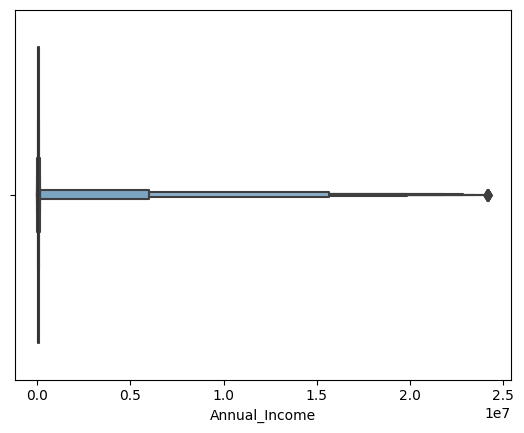

In [106]:
sns.boxenplot(x=final_dataset_encoded_2['Annual_Income'])

<Axes: xlabel='Credit_History_Age'>

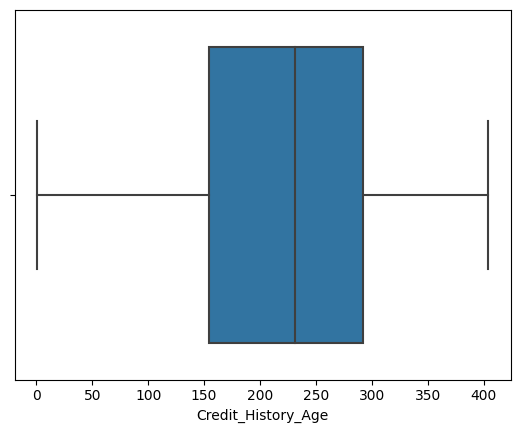

In [107]:
sns.boxplot(x=final_dataset_encoded_2['Credit_History_Age'])

<Axes: xlabel='Outstanding_Debt'>

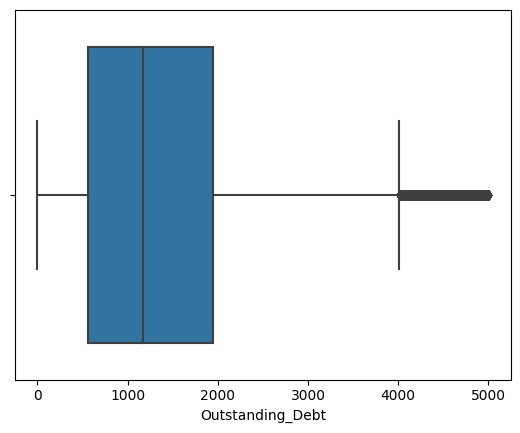

In [108]:
sns.boxplot(x=final_dataset_encoded_2['Outstanding_Debt'])

Lets work on the outliers in different columns like "Num_of_Delayed_Payment", "Total_EMI_per_month", "Num_of_Loan" and "Annual_Income"

/var/folders/kp/gfdljgpj7zvdk7dr6fvxmn340000gn/T/ipykernel_24883/619150192.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=final_dataset_encoded_2['Num_of_Delayed_Payment'])


<Axes: ylabel='Density'>

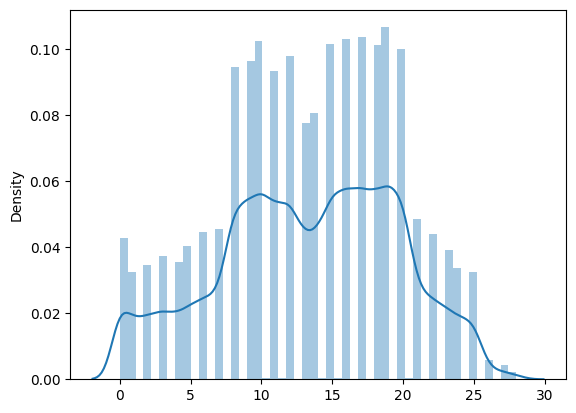

In [109]:
sns.distplot(x=final_dataset_encoded_2['Num_of_Delayed_Payment'])

In [110]:
final_dataset_encoded_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92400 entries, 0 to 92399
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Architect                  92400 non-null  int64  
 1   Developer                  92400 non-null  int64  
 2   Doctor                     92400 non-null  int64  
 3   Engineer                   92400 non-null  int64  
 4   Entrepreneur               92400 non-null  int64  
 5   Journalist                 92400 non-null  int64  
 6   Lawyer                     92400 non-null  int64  
 7   Manager                    92400 non-null  int64  
 8   Mechanic                   92400 non-null  int64  
 9   Media_Manager              92400 non-null  int64  
 10  Musician                   92400 non-null  int64  
 11  Scientist                  92400 non-null  int64  
 12  Teacher                    92400 non-null  int64  
 13  Writer                     92400 non-null  int

In [111]:
numerical_column = [
'Annual_Income',
'Monthly_Inhand_Salary',
'Num_of_Loan',
'Delay_from_due_date',
'Num_of_Delayed_Payment',
'Outstanding_Debt',
'Credit_History_Age',
'Payment_of_Min_Amount',
'Total_EMI_per_month',
'Monthly_Balance',
'Payment_Behaviour_encoded']

categorical_column = ['Customer_ID',
'Payment_Behaviour',
'Credit_Score']

In [112]:
numerical_data = final_dataset_encoded_2[numerical_column]
categorical_data = final_dataset_encoded_2[categorical_column]

Text(0.5, 1.0, 'Correlation Heatmap')

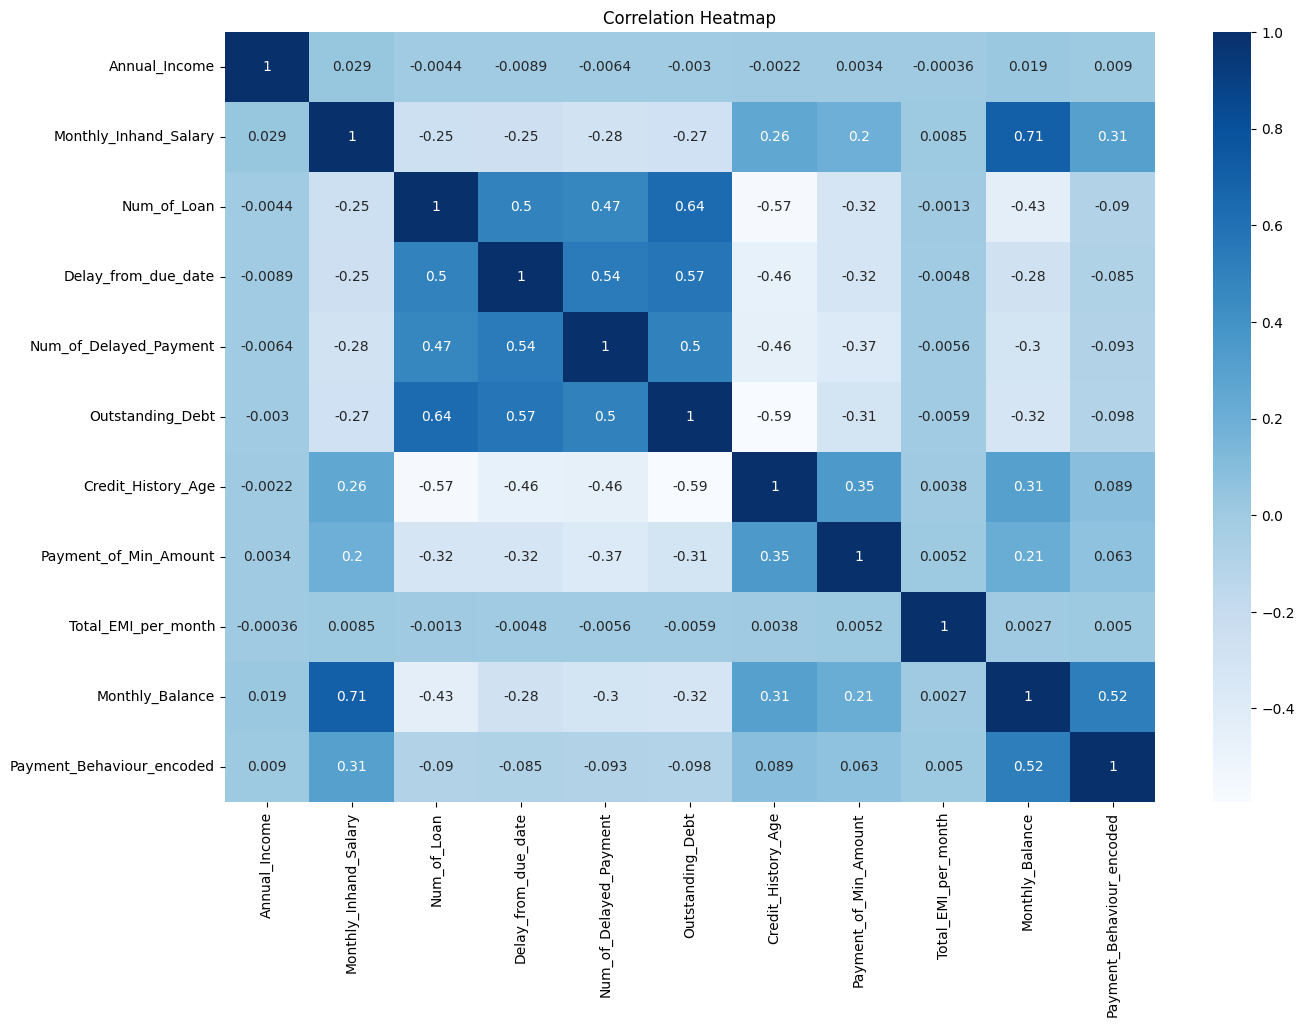

In [113]:
fig = plt.figure(figsize = (15,10))
sns.heatmap(numerical_data.corr(method = 'pearson'), annot = True, cmap = "Blues")
plt.title("Correlation Heatmap")

In [114]:
#STatitical Summary of Numeric Data
numerical_data.describe()

,Annual_Income,Monthly_Inhand_Salary,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance,Payment_Behaviour_encoded
count,9.240000e+04,92400.000000,92400.000000,92400.000000,92400.000000,92400.000000,92400.000000,92400.000000,92400.000000,92400.000000,92400.000000
mean,1.767569e+05,4199.067540,3.528582,21.081926,13.327086,1425.550230,225.483966,0.597359,1408.948563,403.517337,2.245628
std,1.434177e+06,3188.886380,2.443213,14.858830,6.277191,1154.398294,95.970033,0.693637,8324.648660,214.745479,1.847341
min,7.005930e+03,303.645417,0.000000,0.000000,0.000000,0.230000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.943348e+04,1625.558333,2.000000,10.000000,9.000000,566.210000,154.000000,0.000000,30.291558,270.238250,0.000000
50%,3.757392e+04,3093.153333,3.000000,18.000000,14.000000,1165.670000,231.000000,0.000000,69.100853,337.186937,2.000000
75%,7.284956e+04,5967.991667,5.000000,28.000000,18.000000,1945.030000,292.000000,1.000000,160.992411,472.028710,4.000000
max,2.419806e+07,15204.633333,9.000000,67.000000,28.000000,4998.070000,404.000000,2.000000,82331.000000,1602.040519,5.000000


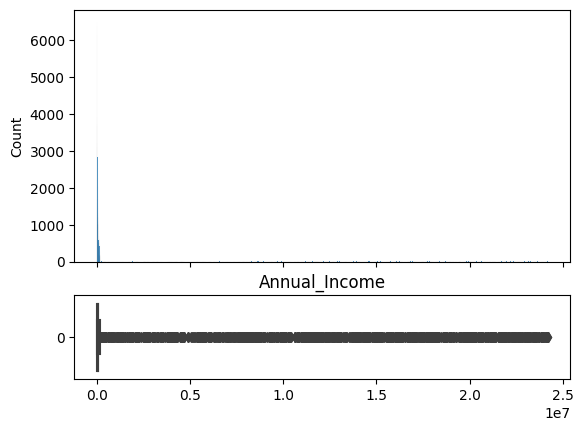

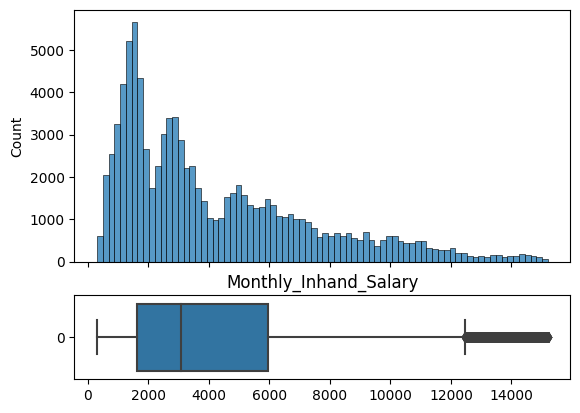

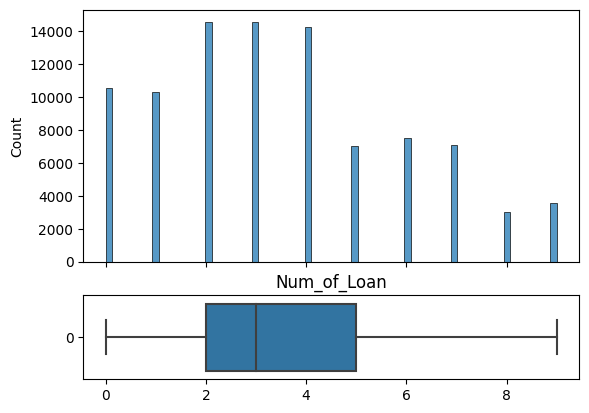

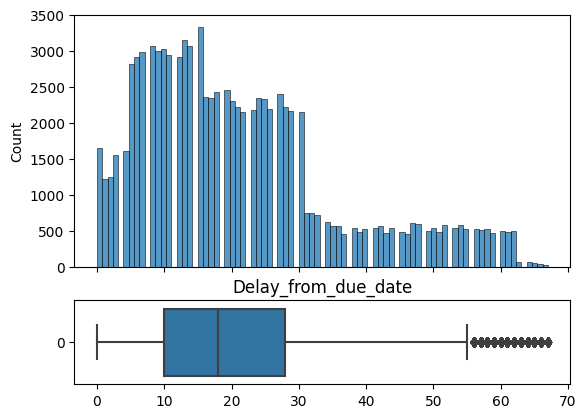

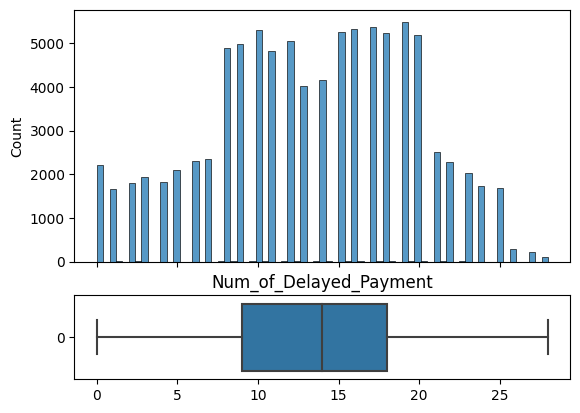

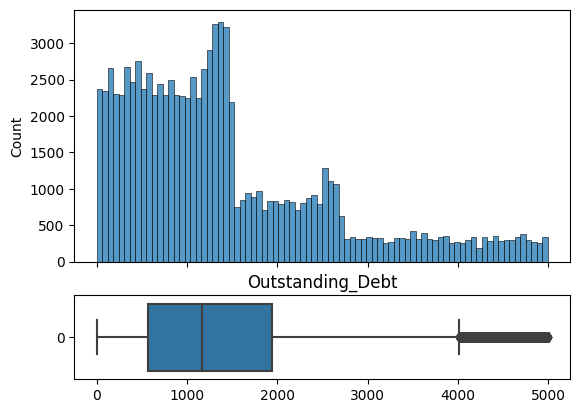

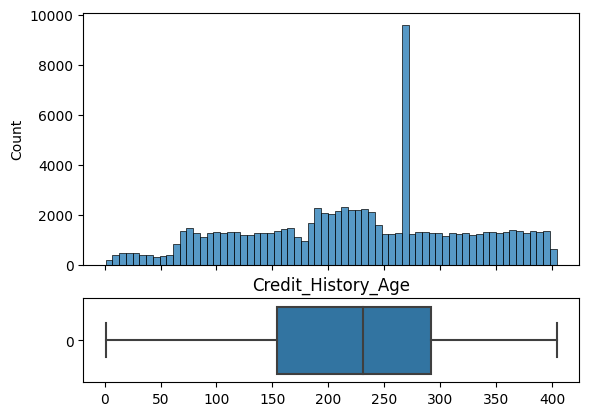

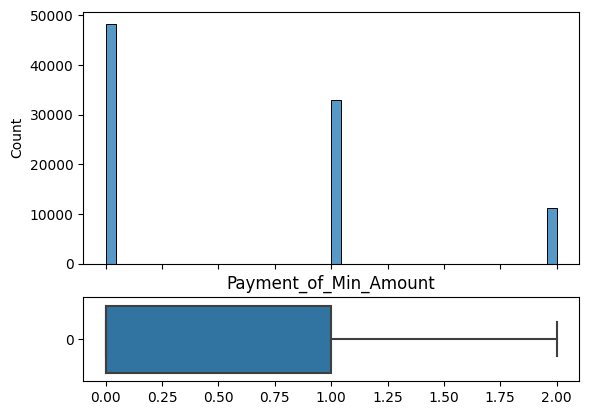

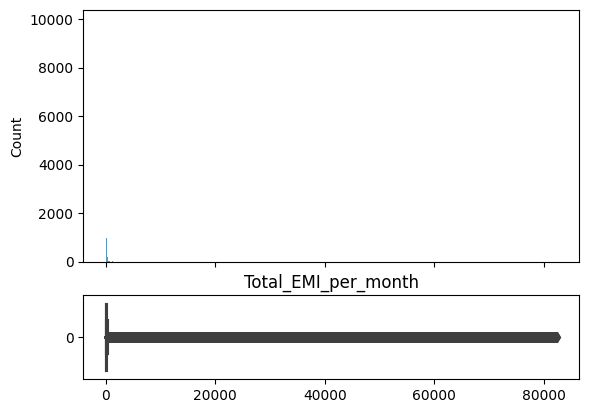

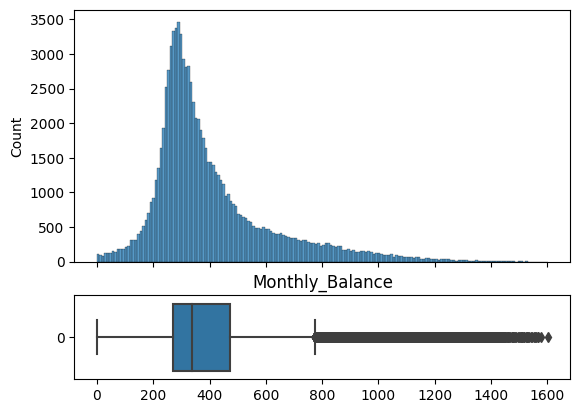

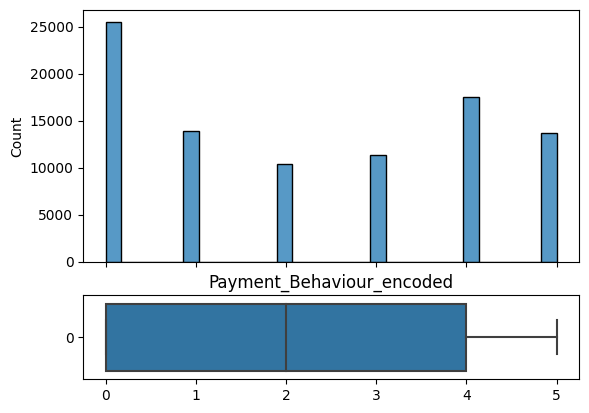

In [115]:
#Use boxplots and histograms to check the distribution and presence of outliers.
for columns in numerical_data:
  fig, (hist, box) = plt.subplots (2, 1, sharex = True, gridspec_kw={'height_ratios': [3, 1]})
  plt.title(columns)
  sns.histplot(numerical_data[columns], ax=hist)
  sns.boxplot (data= numerical_data[columns], orient='h', ax=box)

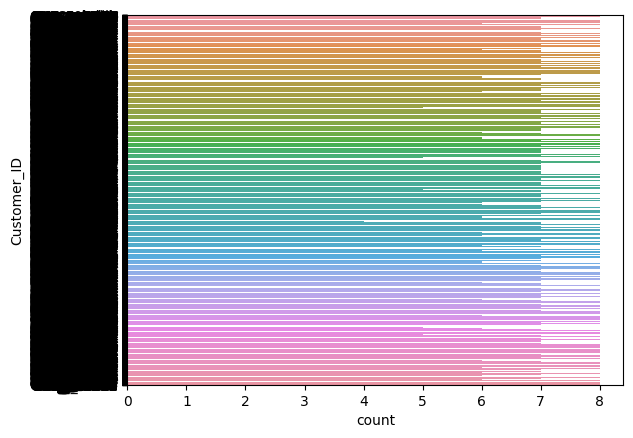

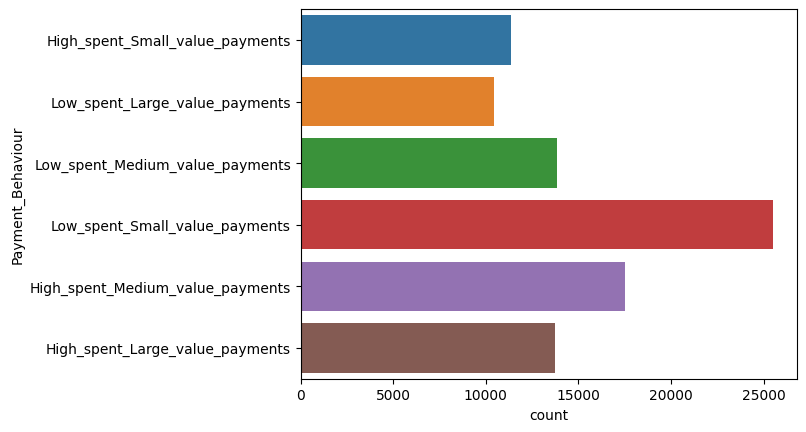

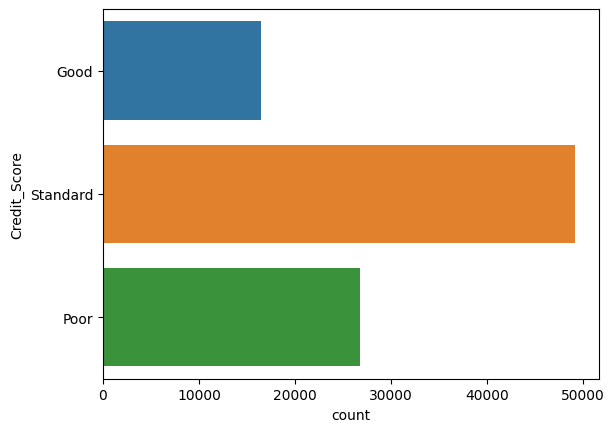

In [116]:
# frequency for each categorical column
for columns in categorical_data:
  sns.countplot(data = categorical_data, y = columns)
  plt.show()

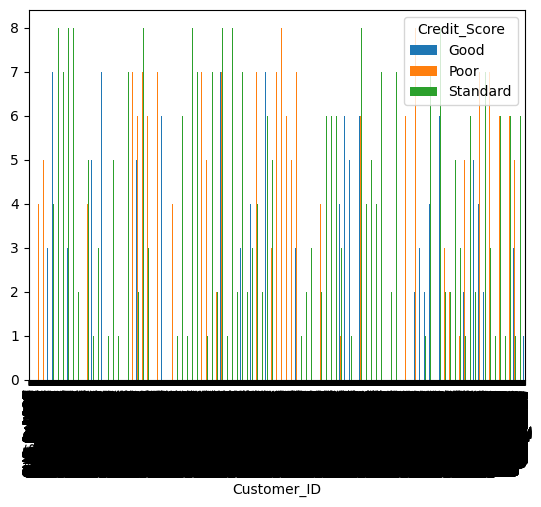

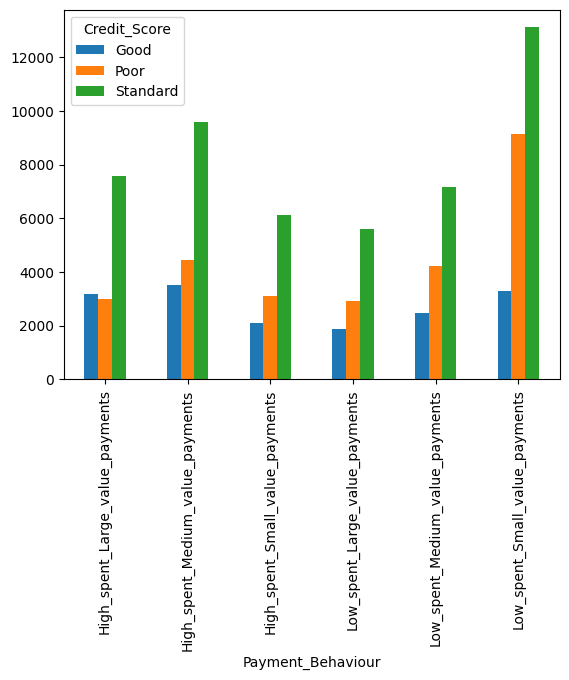

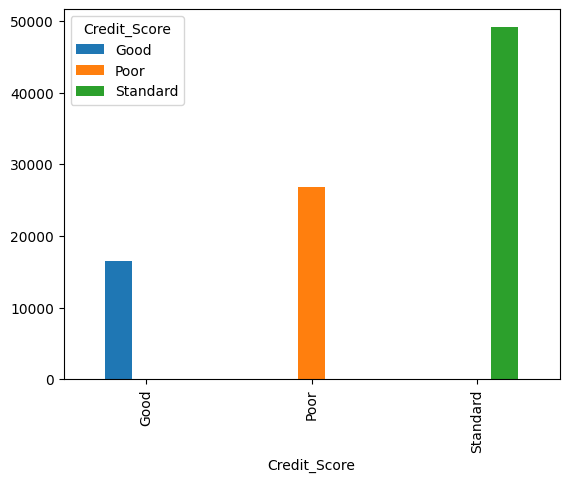

In [117]:
# Creating barcharts related to the Credit_Score
for columns in categorical_data.columns:
 categorical_data.groupby([columns, "Credit_Score"])["Credit_Score"].count().unstack().plot.bar()

<Axes: xlabel='Credit_Score', ylabel='Monthly_Inhand_Salary'>

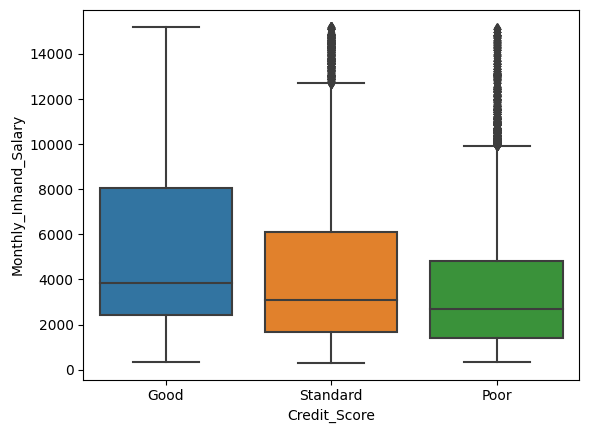

In [118]:
sns.boxplot(data = final_dataset_encoded_2, x = "Credit_Score",  y = "Monthly_Inhand_Salary")

<Axes: xlabel='Credit_Score', ylabel='Num_of_Loan'>

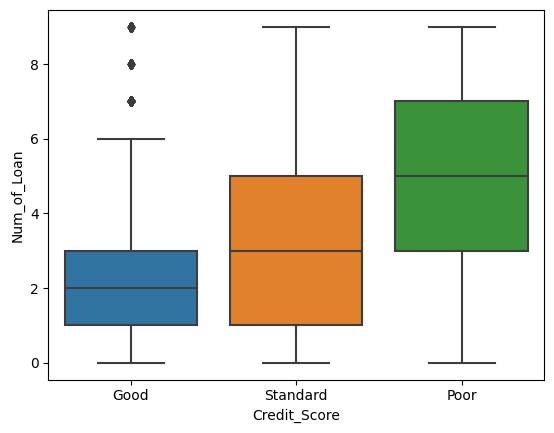

In [119]:
sns.boxplot(data = final_dataset_encoded_2, x = "Credit_Score",  y = "Num_of_Loan")

<Axes: xlabel='Credit_Score', ylabel='Annual_Income'>

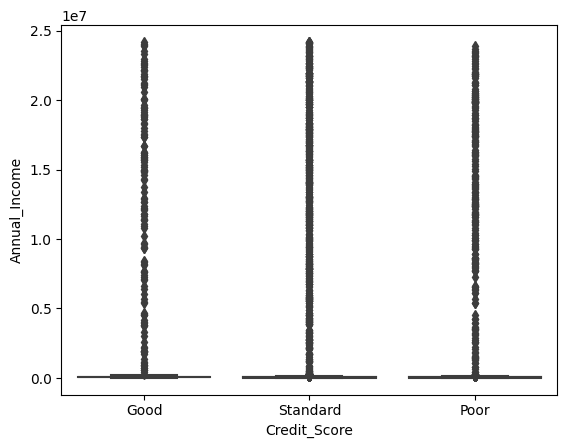

In [120]:
sns.boxplot(data = final_dataset_encoded_2, x = "Credit_Score",  y = "Annual_Income")

<Axes: xlabel='Credit_Score', ylabel='Monthly_Balance'>

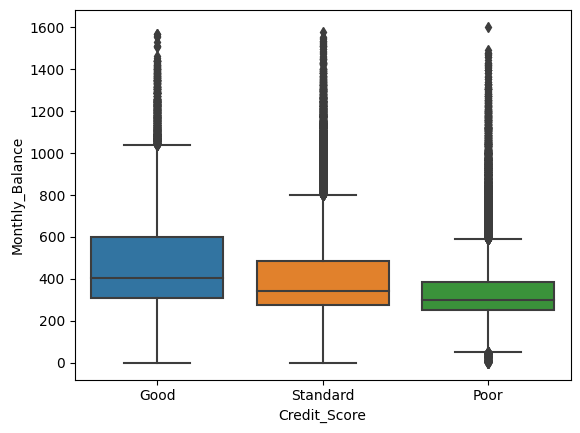

In [121]:
sns.boxplot(data = final_dataset_encoded_2, x = "Credit_Score",  y = "Monthly_Balance")

<Axes: xlabel='Credit_Score', ylabel='Payment_Behaviour_encoded'>

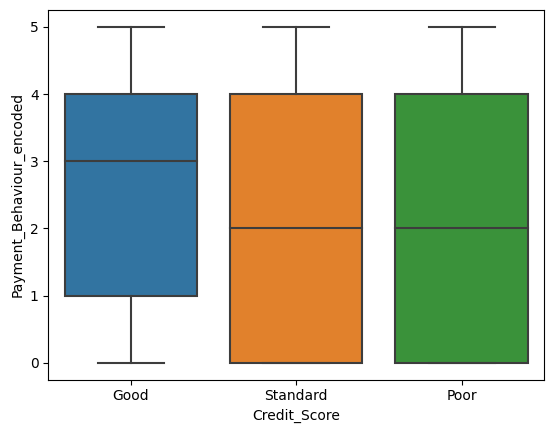

In [122]:
sns.boxplot(data = final_dataset_encoded_2, x = "Credit_Score",  y = "Payment_Behaviour_encoded")

<Axes: xlabel='Credit_Score', ylabel='Num_of_Delayed_Payment'>

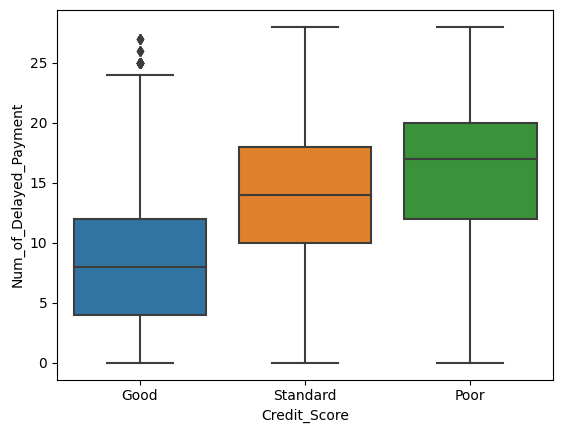

In [123]:
sns.boxplot(data = final_dataset_encoded_2, x = "Credit_Score",  y = "Num_of_Delayed_Payment")

<Axes: xlabel='Annual_Income', ylabel='Monthly_Inhand_Salary'>

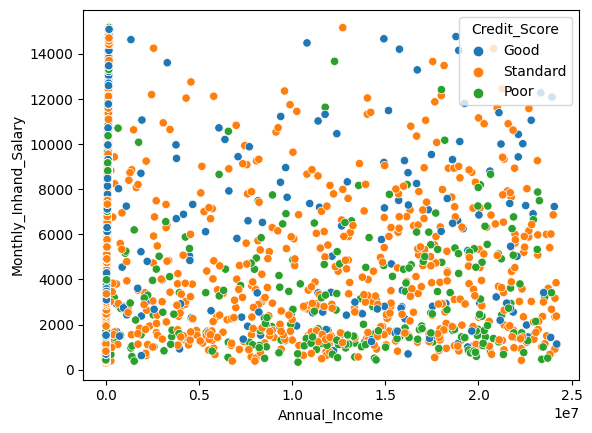

In [124]:
sns.scatterplot (data = final_dataset_encoded_2 , x="Annual_Income", y = "Monthly_Inhand_Salary", hue ="Credit_Score")

<Axes: xlabel='Annual_Income', ylabel='Num_of_Loan'>

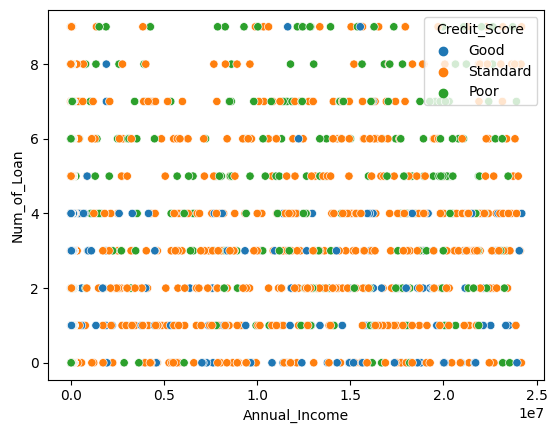

In [125]:
sns.scatterplot (data = final_dataset_encoded_2 , x="Annual_Income", y = "Num_of_Loan", hue ="Credit_Score")

<Axes: xlabel='Annual_Income', ylabel='Outstanding_Debt'>

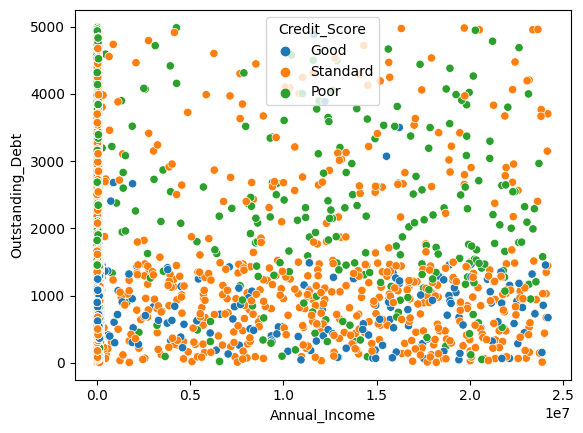

In [126]:
sns.scatterplot (data = final_dataset_encoded_2 , x="Annual_Income", y = "Outstanding_Debt", hue ="Credit_Score")

<Axes: xlabel='Annual_Income', ylabel='Monthly_Balance'>

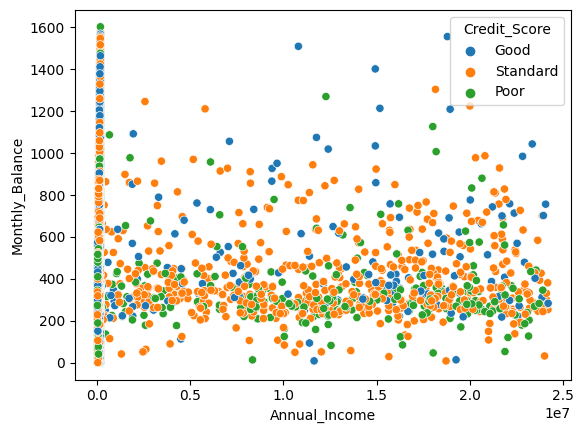

In [127]:
sns.scatterplot (data = final_dataset_encoded_2 , x="Annual_Income", y = "Monthly_Balance", hue ="Credit_Score")

### PCA implementation
We would using PCA inorder to reduce the dimentionality of our data given that we have so many numerical variables and this would enable us to have a better understanding of which variables influence the independent variable more and aslo facility our understanding of the dataset. 



In [128]:
#Cleaning for Modelling 

In [129]:
credit_levels = ["Poor","Standard","Good"]
encoder_CS = OrdinalEncoder(categories=[credit_levels])

In [130]:
final_dataset_encoded_2["Credit_Score"] = encoder_CS.fit_transform(final_dataset_encoded_2[['Credit_Score']])

In [131]:
final_dataset_encoded_2["Credit_Score"] = final_dataset_encoded_2['Credit_Score'].astype(int)

In [132]:
final_dataset_ML = final_dataset_encoded_2.drop(["Payment_Behaviour", "ID", "Customer_ID"], axis=1)

In [133]:
final_dataset_ML.dtypes

Architect                      int64
Developer                      int64
Doctor                         int64
Engineer                       int64
Entrepreneur                   int64
Journalist                     int64
Lawyer                         int64
Manager                        int64
Mechanic                       int64
Media_Manager                  int64
Musician                       int64
Scientist                      int64
Teacher                        int64
Writer                         int64
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_of_Loan                  float64
Delay_from_due_date          float64
Num_of_Delayed_Payment       float64
Outstanding_Debt             float64
Credit_History_Age           float64
Payment_of_Min_Amount        float64
Total_EMI_per_month          float64
Monthly_Balance              float64
Credit_Score                   int64
Payment_Behaviour_encoded    float64
dtype: object

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize


scaler = StandardScaler()

#fitting
cred_scaled = scaler.fit_transform(final_dataset_ML)

#Normalizing our data with mean 0 and standard deviation, so it follows a normal distribution
cred_normalized = normalize(cred_scaled)

#Dimentioonality reduction
pca = PCA(n_components=3)
cred_principal = pca.fit_transform(cred_normalized)
x_pca = cred_principal

Text(0.5, 0, 'Third Principal Component')

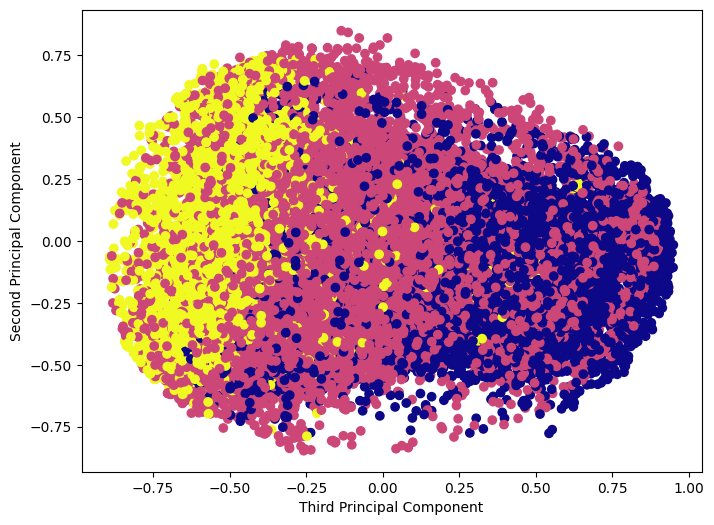

In [135]:
# giving a larger plot
plt.figure(figsize =(8, 6))

plt.scatter(x_pca[:,0],x_pca[:, 1], c=final_dataset_ML['Credit_Score'], cmap='plasma')


plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.xlabel('Third Principal Component')



In [136]:
pca.components_

array([[-1.01573749e-02,  4.79641717e-03,  4.21520636e-03,
         6.16722232e-03,  1.15427085e-03, -2.61373927e-04,
        -2.35301824e-03, -8.89897482e-04,  6.72426502e-03,
        -3.75227535e-03, -6.00043986e-03,  3.09856460e-03,
         3.54511328e-03,  5.74385767e-03, -5.58847628e-03,
        -2.38280668e-01,  3.79826810e-01,  3.52891517e-01,
         3.51357828e-01,  3.75826431e-01, -3.74315729e-01,
        -2.84901862e-01,  7.33701896e-04, -2.73743305e-01,
        -3.06871582e-01, -1.37712830e-01],
       [-2.25929758e-02, -1.64231864e-02,  4.05285362e-02,
        -2.38030161e-02, -1.25763826e-02,  2.01077028e-02,
        -8.42514890e-03, -2.65269376e-02,  2.26241404e-02,
         1.58968466e-02, -2.94968533e-04,  6.98591774e-03,
        -2.74898944e-02, -2.18482184e-02, -1.84664411e-02,
        -4.66604450e-01, -1.11812193e-01, -1.68609830e-01,
        -1.35258234e-01, -1.55774426e-01,  1.53677642e-01,
         1.26859077e-01, -1.35055834e-02, -5.06045600e-01,
         1.09

In [137]:
final_dataset_ML

,Architect,Developer,Doctor,Engineer,Entrepreneur,Journalist,Lawyer,Manager,Mechanic,Media_Manager,...,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance,Credit_Score,Payment_Behaviour_encoded
0,0,0,0,0,0,0,0,0,0,0,...,4.0,3.0,7.0,809.98,265.0,1.0,49.574949,312.494089,2,3.0
1,0,0,0,0,0,0,0,0,0,0,...,4.0,0.0,6.5,809.98,267.5,1.0,49.574949,284.629162,2,2.0
2,0,0,0,0,0,0,0,0,0,0,...,4.0,3.0,7.0,809.98,267.0,1.0,49.574949,331.209863,2,1.0
3,0,0,0,0,0,0,0,0,0,0,...,4.0,5.0,4.0,809.98,268.0,1.0,49.574949,223.451310,2,0.0
4,0,0,0,0,0,0,0,0,0,0,...,4.0,6.0,6.5,809.98,269.0,1.0,49.574949,341.489231,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92395,0,0,0,0,0,0,0,0,1,0,...,2.0,20.0,6.0,502.38,377.0,1.0,35.104023,410.256158,0,4.0
92396,0,0,0,0,0,0,0,0,1,0,...,2.0,23.0,7.0,502.38,378.0,1.0,35.104023,479.866228,0,5.0
92397,0,0,0,0,0,0,0,0,1,0,...,2.0,18.0,7.0,502.38,379.0,1.0,35.104023,496.651610,0,4.0
92398,0,0,0,0,0,0,0,0,1,0,...,2.0,27.0,6.0,502.38,380.0,1.0,35.104023,516.809083,0,5.0


<Axes: >

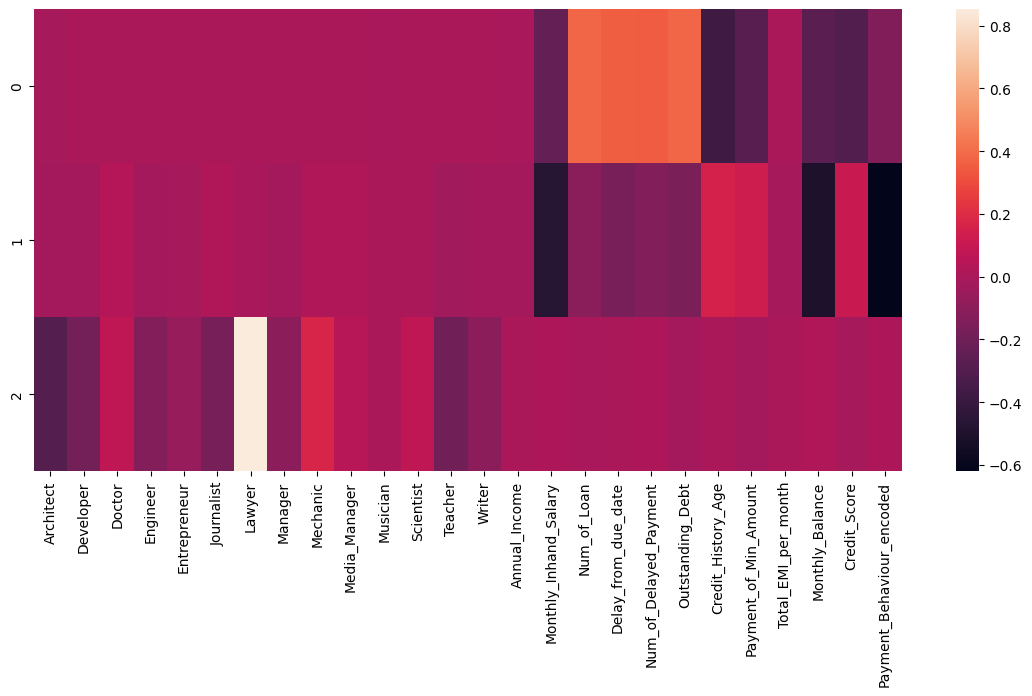

In [138]:
credit_comp = pd.DataFrame(pca.components_, columns=final_dataset_ML.columns)

plt.figure(figsize=(14,6))

sns.heatmap(credit_comp)

In [139]:
cred_principal = pd.DataFrame(cred_principal)
cred_principal.columns = ['P1','P2','P3']
print(cred_principal.head())

         P1        P2        P3
0 -0.313550  0.226929  0.049327
1 -0.308371  0.317887  0.046055
2 -0.286844  0.359648  0.046821
3 -0.253891  0.467962  0.039574
4 -0.328494  0.135739  0.050638


## DBSCAN implementation

In [140]:
from sklearn.cluster import DBSCAN

cred_clustering = DBSCAN(eps=0.0375, min_samples=10).fit(cred_principal)
labels = cred_clustering.labels_

In [141]:
print('Shapes of cred_principal and labels:', cred_principal.shape, labels.shape)

Shapes of cred_principal and labels: (92400, 3) (92400,)


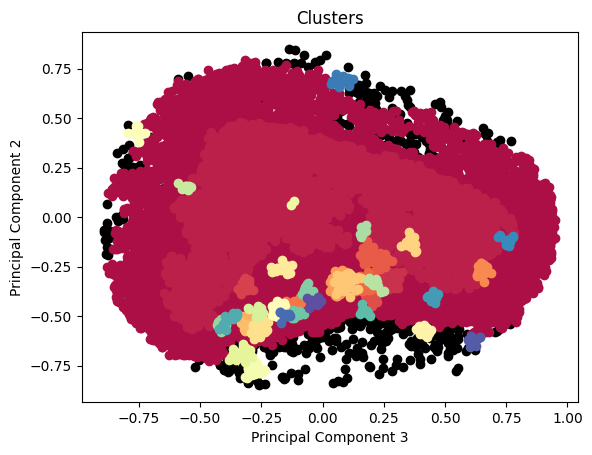

In [142]:
# Convert cred_principal to a NumPy array
cred_principal_arr = cred_principal.to_numpy()

# Determine unique labels and assign colors
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
color_dict = dict(zip(unique_labels, colors))

# Plot the clustered data
for label in unique_labels:
    if label == -1:
        # Plot noise points as black
        plt.scatter(cred_principal_arr[labels == label, 0], cred_principal_arr[labels == label, 1], color='k')
    else:
        plt.scatter(cred_principal_arr[labels == label, 0], cred_principal_arr[labels == label, 1], color=color_dict[label])

plt.title('Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xlabel('Principal Component 3')
plt.show()
